In [0]:
import os
import zipfile
import random
import numpy as np

In [2]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/datsets/DRIVE.zip"\
    -O "/tmp/DRIVE.zip"

local_zip = '/tmp/DRIVE.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2020-04-11 10:26:49--  https://storage.googleapis.com/datsets/DRIVE.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29756930 (28M) [application/x-zip-compressed]
Saving to: ‘/tmp/DRIVE.zip’

/tmp/DRIVE.zip      100%[===================>]  28.38M  71.1MB/s    in 0.4s    

2020-04-11 10:26:50 (71.1 MB/s) - ‘/tmp/DRIVE.zip’ saved [29756930/29756930]



In [4]:
import subprocess,sys
!wget --no-check-certificate \
    "https://storage.googleapis.com/datsets/model1/13%20by%2013/patches13n13nskip2.zip"\
    -O "/tmp/patches.zip"

zipFile = '/tmp/patches.zip'
destinationDirectory='/tmp'
subprocess.Popen(["7z", "e", f"{zipFile}", f"-o{destinationDirectory}", "-y"])
# zip_ref   = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()


--2020-04-11 10:27:08--  https://storage.googleapis.com/datsets/model1/13%20by%2013/patches13n13nskip2.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106354810 (101M) [application/x-zip-compressed]
Saving to: ‘/tmp/patches.zip’

/tmp/patches.zip    100%[===================>] 101.43M   182MB/s    in 0.6s    

2020-04-11 10:27:09 (182 MB/s) - ‘/tmp/patches.zip’ saved [106354810/106354810]



In [0]:
X = np.load('/tmp/patches13n13nskip2.npy')

In [7]:
X.shape

(1652720, 13, 13, 3)

In [10]:
y=np.load('/content/outputs.npy')
w=y//255
z=set(w)
y=w
y.shape

(1652720,)

In [0]:
X_train,X_val,y_train,y_val=X[0:1500000,:,:],X[1500000:1652720,:,:],y[0:1500000],y[1500000:1652720]

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3, 3), activation='relu', input_shape=(13,13,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_val,y_val))
model.save('model1st11by11.hdf5')

Epoch 1/10
23438/23438 [==============================] - 65s 3ms/step - loss: 0.1480 - accuracy: 0.9549 - val_loss: 0.1100 - val_accuracy: 0.9628
Epoch 2/10
23438/23438 [==============================] - 64s 3ms/step - loss: 0.1135 - accuracy: 0.9597 - val_loss: 0.0975 - val_accuracy: 0.9638
Epoch 3/10
23438/23438 [==============================] - 64s 3ms/step - loss: 0.1105 - accuracy: 0.9601 - val_loss: 0.0969 - val_accuracy: 0.9648
Epoch 4/10
23438/23438 [==============================] - 63s 3ms/step - loss: 0.1099 - accuracy: 0.9604 - val_loss: 0.1042 - val_accuracy: 0.9644
Epoch 5/10
23438/23438 [==============================] - 62s 3ms/step - loss: 0.1106 - accuracy: 0.9602 - val_loss: 0.0944 - val_accuracy: 0.9647
Epoch 6/10
23438/23438 [==============================] - 62s 3ms/step - loss: 0.1102 - accuracy: 0.9604 - val_loss: 0.1093 - val_accuracy: 0.9596
Epoch 7/10
23438/23438 [==============================] - 62s 3ms/step - loss: 0.1107 - accuracy: 0.9603 - val_loss: 0

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 11, 11, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              820224    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 1,346,433
Trainable params: 1,346,433
Non-trainable params: 0
______________________________________________

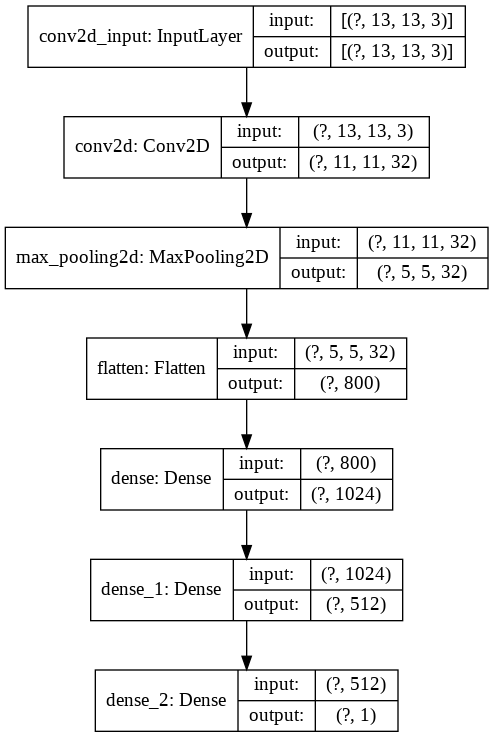

In [13]:
tf.keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

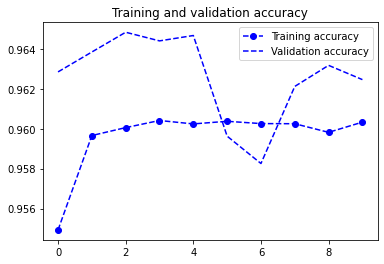

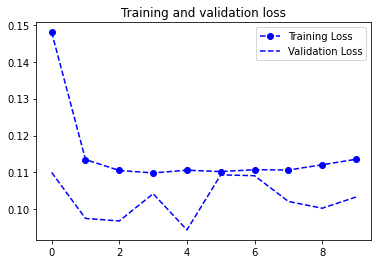

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy',linestyle='dashed')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',linestyle='dashed')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss',linestyle='dashed')
plt.plot(epochs, val_loss, 'b', label='Validation Loss',linestyle='dashed')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model.summary()

NameError: ignored

In [0]:
history

AttributeError: ignored

In [0]:
import pandas as pd
df = pd.DataFrame(history.history)

In [18]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.147977,0.954935,0.110006,0.962840
1,0.113496,0.959657,0.097542,0.963836
2,0.110531,0.960053,0.096860,0.964824
3,0.109870,0.960409,0.104235,0.964392
4,0.110606,0.960238,0.094434,0.964661
5,0.110238,0.960369,0.109350,0.959625
6,0.110741,0.960255,0.109116,0.958257
7,0.110659,0.960247,0.102145,0.962114
8,0.112076,0.959817,0.100304,0.963168
9,0.113572,0.960327,0.103348,0.962454


In [0]:
df.to_excel('model1st21by21_history.xlsx')